In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import os

# 导入项目中的模块
from models import SimpleMLP, DeepMLP, ResidualMLP, SimpleCNN, MediumCNN, VGGStyleNet, SimpleResNet, PretrainedViT
from utils import (
    load_cifar10,
    set_seed,
    train_model,
    evaluate_model,
    plot_training_history,
    visualize_model_predictions,
    visualize_conv_filters,
    model_complexity
)


c:\Users\20911\anaconda3\envs\pytorch\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
c:\Users\20911\anaconda3\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# 设置参数
model_type = 'simple_mlp'  # 可选: 'simple_mlp', 'deep_mlp', 'residual_mlp', 'simple_cnn', 'medium_cnn', 'vgg_style', 'resnet'
epochs = 20
learning_rate = 0.001
batch_size = 128
use_data_augmentation = True  # CNN通常受益于数据增强
save_directory = './ck'
visualize_filters = True  # 是否可视化卷积核（仅对CNN有效）
visualize_predictions = True  # 是否可视化预测结果

# 设置随机种子
set_seed()

#因为mo平台的提交任务机制，需要手动切换到该文件夹下。
# os.chdir(os.path.expanduser("~/work/Jianhai/lab5"))

# 检查是否有可用的GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"使用设备: {device}")

# 加载数据
train_loader, valid_loader, test_loader, classes = load_cifar10(
    use_augmentation=use_data_augmentation,
    batch_size=batch_size
)

# 初始化选择的模型
if model_type == 'simple_mlp':
    model = SimpleMLP()
    model_name = "SimpleMLP"
elif model_type == 'deep_mlp':
    model = DeepMLP(dropout_rate=0.5, use_bn=True, use_dropout=True)
    model_name = "DeepMLP"
elif model_type == 'residual_mlp':
    model = ResidualMLP(activation='relu')
    model_name = "ResidualMLP"
elif model_type == 'simple_cnn':
    model = SimpleCNN()
    model_name = "SimpleCNN"
elif model_type == 'medium_cnn':
    model = MediumCNN(use_bn=True)
    model_name = "MediumCNN"
elif model_type == 'vgg_style':
    model = VGGStyleNet()
    model_name = "VGGStyleNet"
else:  # resnet
    model = SimpleResNet(num_blocks=[2, 2, 2])
    model_name = "SimpleResNet"

print(f"使用模型: {model_name}")


使用设备: cuda:0
Files already downloaded and verified
Files already downloaded and verified
训练集大小: 45000
验证集大小: 5000
测试集大小: 10000
使用模型: SimpleMLP



分析模型复杂度:
参数量: 1,578,506
每批次(128个样本)推理时间: 0.07ms
Epoch 1/20
模型已保存到 ./ck/SimpleMLP_best.pth
训练损失: 1.8800, 训练准确率: 0.3436
验证损失: 1.7364, 验证准确率: 0.3756
本轮用时: 13.89s
--------------------------------------------------
Epoch 2/20
模型已保存到 ./ck/SimpleMLP_best.pth
训练损失: 1.7063, 训练准确率: 0.3973
验证损失: 1.6912, 验证准确率: 0.4042
本轮用时: 38.03s
--------------------------------------------------
Epoch 3/20
模型已保存到 ./ck/SimpleMLP_best.pth
训练损失: 1.6475, 训练准确率: 0.4184
验证损失: 1.6331, 验证准确率: 0.4228
本轮用时: 37.70s
--------------------------------------------------
Epoch 4/20
模型已保存到 ./ck/SimpleMLP_best.pth
训练损失: 1.6206, 训练准确率: 0.4292
验证损失: 1.6280, 验证准确率: 0.4252
本轮用时: 13.56s
--------------------------------------------------
Epoch 5/20
模型已保存到 ./ck/SimpleMLP_best.pth
训练损失: 1.5875, 训练准确率: 0.4379
验证损失: 1.6024, 验证准确率: 0.4392
本轮用时: 15.32s
--------------------------------------------------
Epoch 6/20
模型已保存到 ./ck/SimpleMLP_best.pth
训练损失: 1.5638, 训练准确率: 0.4466
验证损失: 1.5661, 验证准确率: 0.4464
本轮用时: 45.43s
------------------------------

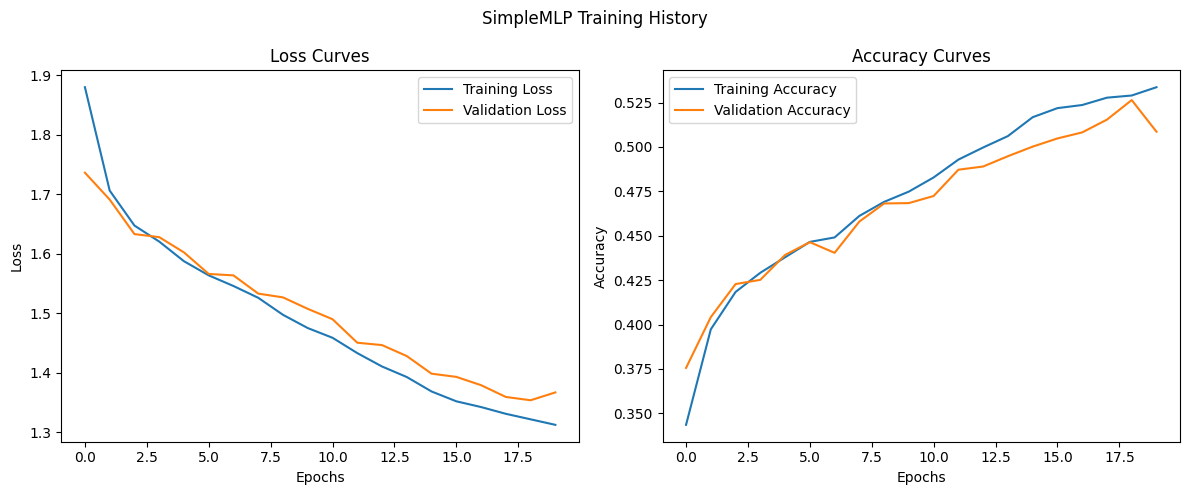


在测试集上评估模型:
测试损失: 1.4036, 测试准确率: 0.5114


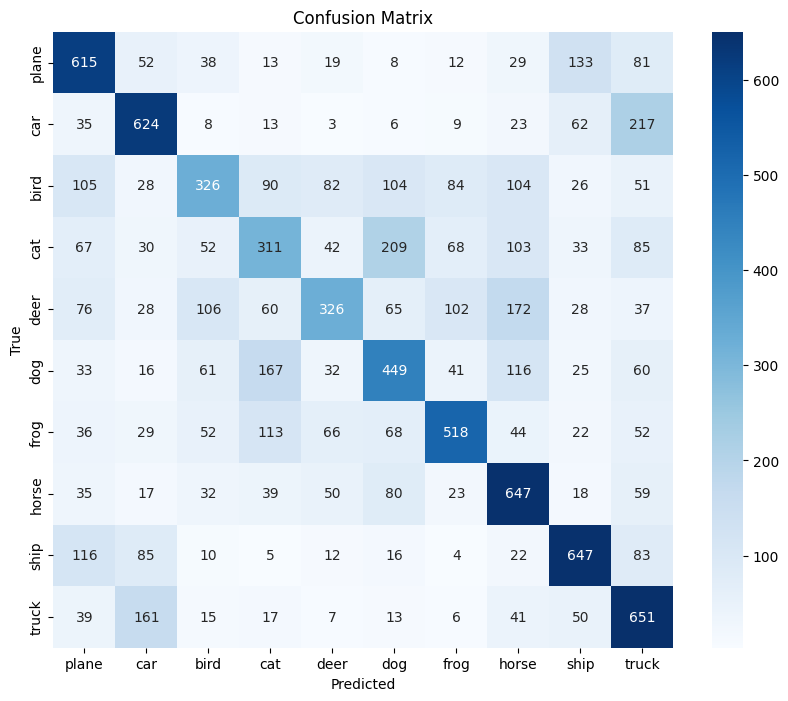

分类报告:
              precision    recall  f1-score   support

       plane       0.53      0.61      0.57      1000
         car       0.58      0.62      0.60      1000
        bird       0.47      0.33      0.38      1000
         cat       0.38      0.31      0.34      1000
        deer       0.51      0.33      0.40      1000
         dog       0.44      0.45      0.44      1000
        frog       0.60      0.52      0.55      1000
       horse       0.50      0.65      0.56      1000
        ship       0.62      0.65      0.63      1000
       truck       0.47      0.65      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000

SimpleMLP 最终测试准确率: 0.5114

可视化模型预测:


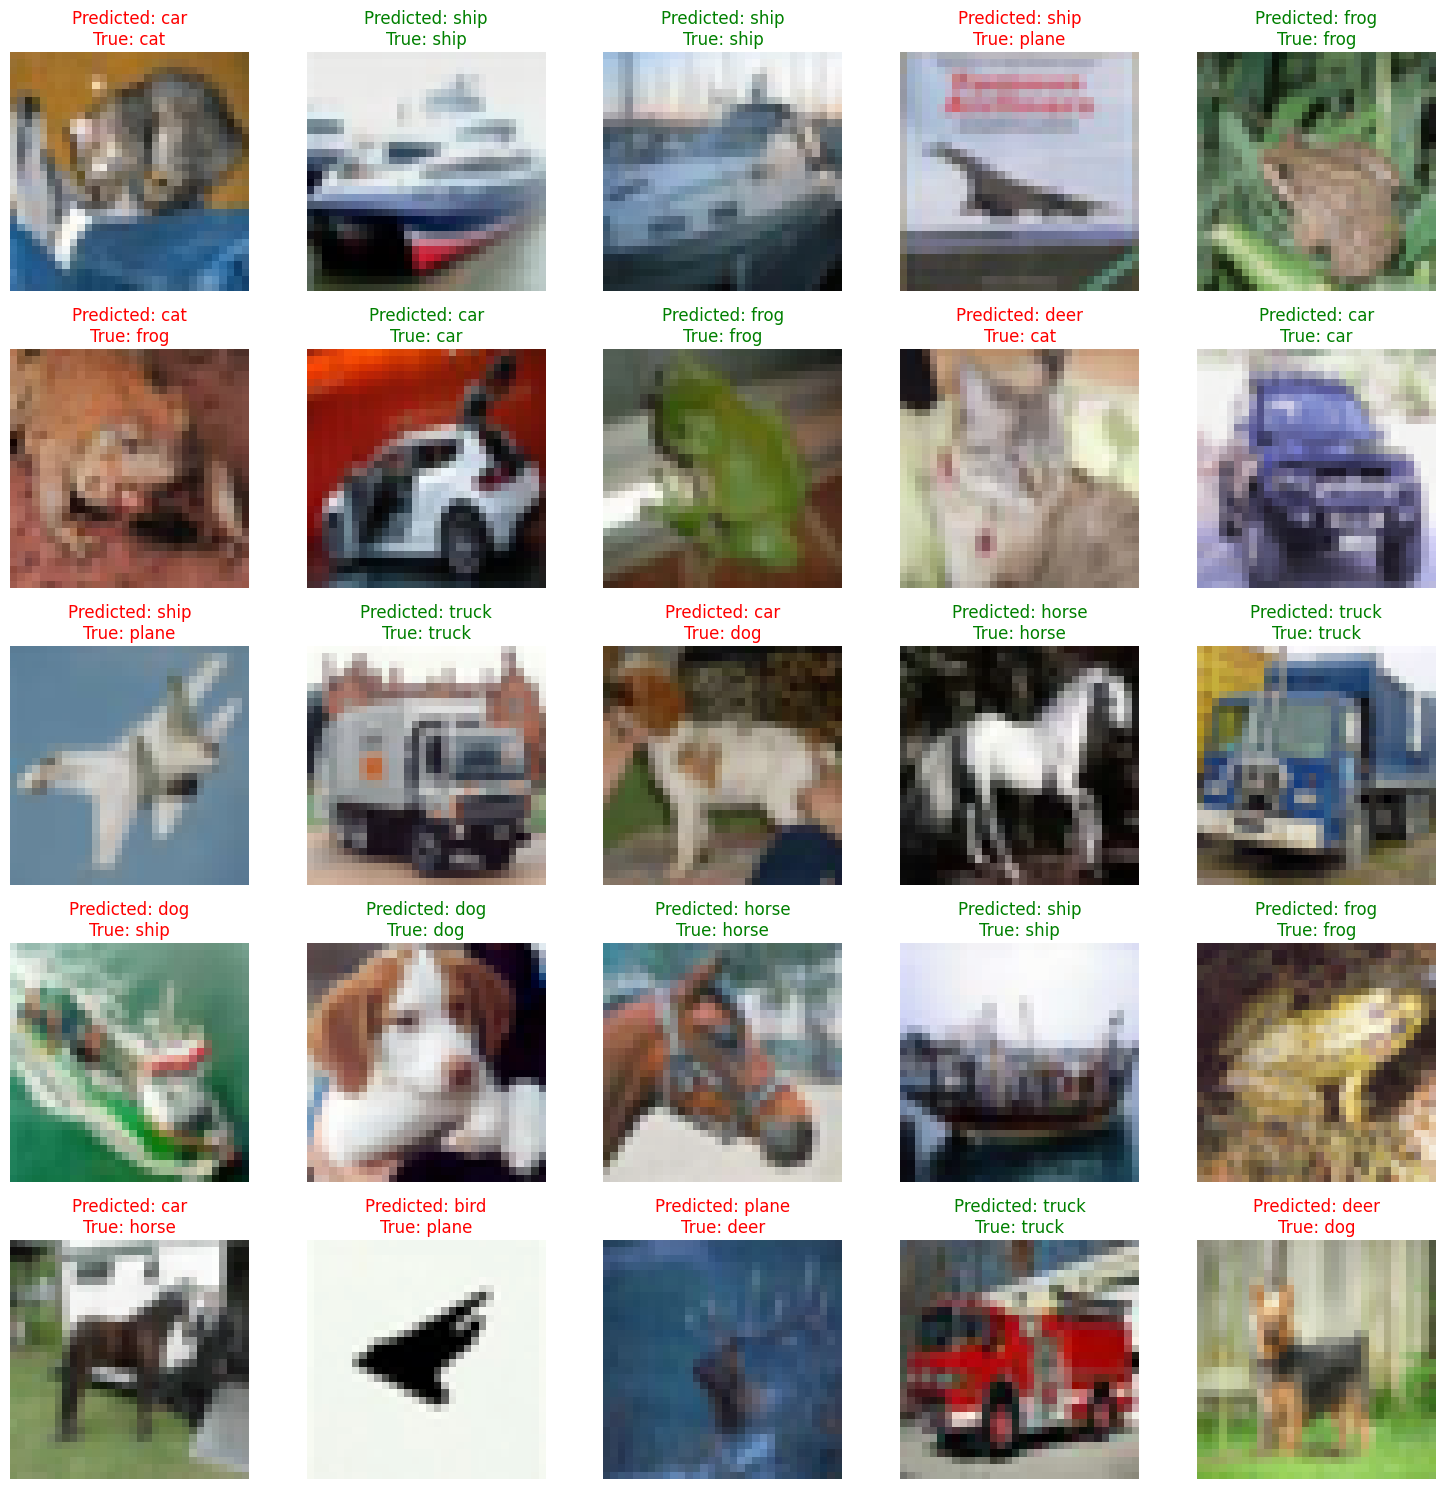


SimpleMLP的训练和评估已完成！


In [ ]:
# 计算模型复杂度
print("\n分析模型复杂度:")
model_complexity(model, device=device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 可以添加学习率调度器
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

# 确保checkpoints目录存在
os.makedirs(save_directory, exist_ok=True)

# 训练模型
trained_model, history = train_model(
    model, train_loader, valid_loader, criterion, optimizer, scheduler,
    num_epochs=epochs, device=device, save_dir=save_directory
)

# 绘制训练历史
plot_training_history(history, title=f"{model_name} Training History")

# 在测试集上评估模型
print("\n在测试集上评估模型:")
test_loss, test_acc = evaluate_model(trained_model, test_loader, criterion, device, classes)

print(f"{model_name} 最终测试准确率: {test_acc:.4f}")

# 如果是CNN模型并且需要可视化卷积核
if visualize_filters and model_type in ['simple_cnn', 'medium_cnn', 'vgg_style', 'resnet']:
    print("\n可视化卷积核:")
    if model_type == 'simple_cnn':
        visualize_conv_filters(trained_model, 'conv1')
    elif model_type == 'medium_cnn':
        visualize_conv_filters(trained_model, 'conv1')
    elif model_type == 'vgg_style':
        visualize_conv_filters(trained_model, 'features.0')
    else:  # resnet
        visualize_conv_filters(trained_model, 'conv1')

# 如果需要可视化模型预测
if visualize_predictions:
    print("\n可视化模型预测:")
    visualize_model_predictions(trained_model, test_loader, classes, device)

print(f"\n{model_name}的训练和评估已完成！")


In [8]:
model = PretrainedViT()

# 计算模型复杂度
print("\n分析模型复杂度:")
model_complexity(model, device=device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 可以添加学习率调度器
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

# 确保checkpoints目录存在
os.makedirs(save_directory, exist_ok=True)



分析模型复杂度:
参数量: 5,526,346
每批次(128个样本)推理时间: 997.72ms


In [10]:

# 训练模型
trained_model, history = train_model(
    model, train_loader, valid_loader, criterion, optimizer, scheduler,
    num_epochs=epochs, device=device, save_dir=save_directory
)

# 绘制训练历史
plot_training_history(history, title=f"{model_name} Training History")

# 在测试集上评估模型
print("\n在测试集上评估模型:")
test_loss, test_acc = evaluate_model(trained_model, test_loader, criterion, device, classes)

print(f"{model_name} 最终测试准确率: {test_acc:.4f}")

# 如果是CNN模型并且需要可视化卷积核
if visualize_filters and model_type in ['simple_cnn', 'medium_cnn', 'vgg_style', 'resnet']:
    print("\n可视化卷积核:")
    if model_type == 'simple_cnn':
        visualize_conv_filters(trained_model, 'conv1')
    elif model_type == 'medium_cnn':
        visualize_conv_filters(trained_model, 'conv1')
    elif model_type == 'vgg_style':
        visualize_conv_filters(trained_model, 'features.0')
    else:  # resnet
        visualize_conv_filters(trained_model, 'conv1')

# 如果需要可视化模型预测
if visualize_predictions:
    print("\n可视化模型预测:")
    visualize_model_predictions(trained_model, test_loader, classes, device)

print(f"\n{model_name}的训练和评估已完成！")


Epoch 1/20


KeyboardInterrupt: 


分析模型复杂度:
参数量: 2,169,770
每批次(128个样本)推理时间: 0.88ms
Epoch 1/20
模型已保存到 ./ck/MediumCNN_best.pth
训练损失: 1.4552, 训练准确率: 0.4722
验证损失: 1.2224, 验证准确率: 0.5606
本轮用时: 13.61s
--------------------------------------------------
Epoch 2/20
模型已保存到 ./ck/MediumCNN_best.pth
训练损失: 1.0969, 训练准确率: 0.6108
验证损失: 0.9630, 验证准确率: 0.6574
本轮用时: 16.01s
--------------------------------------------------
Epoch 3/20
模型已保存到 ./ck/MediumCNN_best.pth
训练损失: 0.9708, 训练准确率: 0.6559
验证损失: 0.8517, 验证准确率: 0.7016
本轮用时: 13.28s
--------------------------------------------------
Epoch 4/20
模型已保存到 ./ck/MediumCNN_best.pth
训练损失: 0.8977, 训练准确率: 0.6838
验证损失: 0.7780, 验证准确率: 0.7232
本轮用时: 20.30s
--------------------------------------------------
Epoch 5/20
训练损失: 0.8386, 训练准确率: 0.7045
验证损失: 0.8017, 验证准确率: 0.7138
本轮用时: 55.69s
--------------------------------------------------
Epoch 6/20
模型已保存到 ./ck/MediumCNN_best.pth
训练损失: 0.8022, 训练准确率: 0.7168
验证损失: 0.7264, 验证准确率: 0.7438
本轮用时: 55.65s
--------------------------------------------------
Epoch 7/20

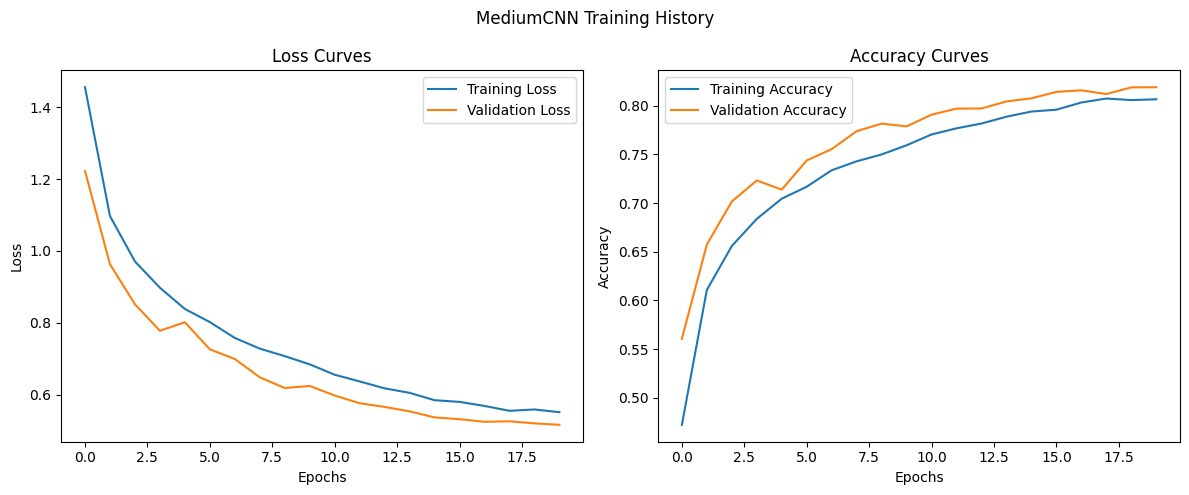


在测试集上评估模型:
测试损失: 0.4776, 测试准确率: 0.8356


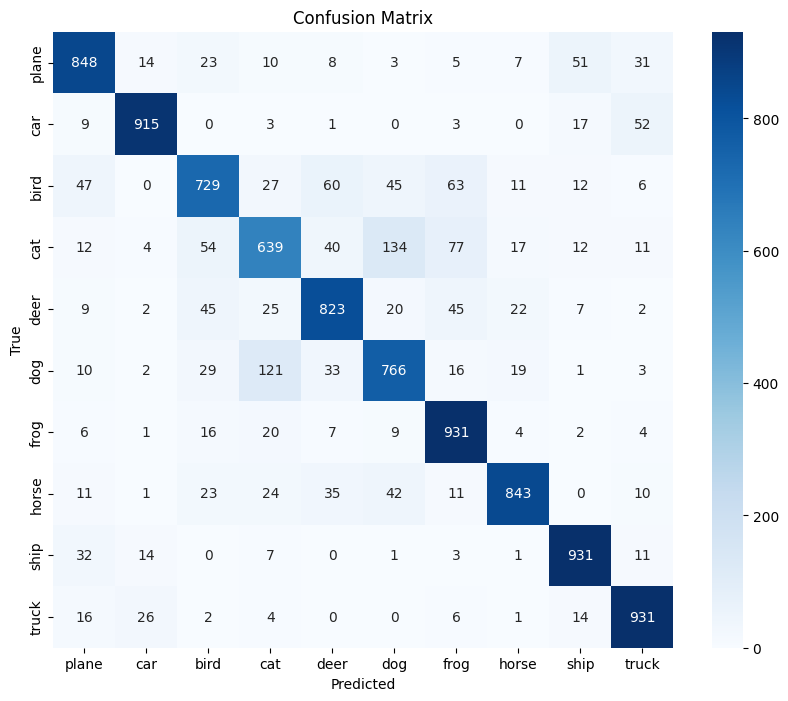

分类报告:
              precision    recall  f1-score   support

       plane       0.85      0.85      0.85      1000
         car       0.93      0.92      0.92      1000
        bird       0.79      0.73      0.76      1000
         cat       0.73      0.64      0.68      1000
        deer       0.82      0.82      0.82      1000
         dog       0.75      0.77      0.76      1000
        frog       0.80      0.93      0.86      1000
       horse       0.91      0.84      0.88      1000
        ship       0.89      0.93      0.91      1000
       truck       0.88      0.93      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.83     10000
weighted avg       0.83      0.84      0.83     10000

MediumCNN 最终测试准确率: 0.8356

可视化卷积核:


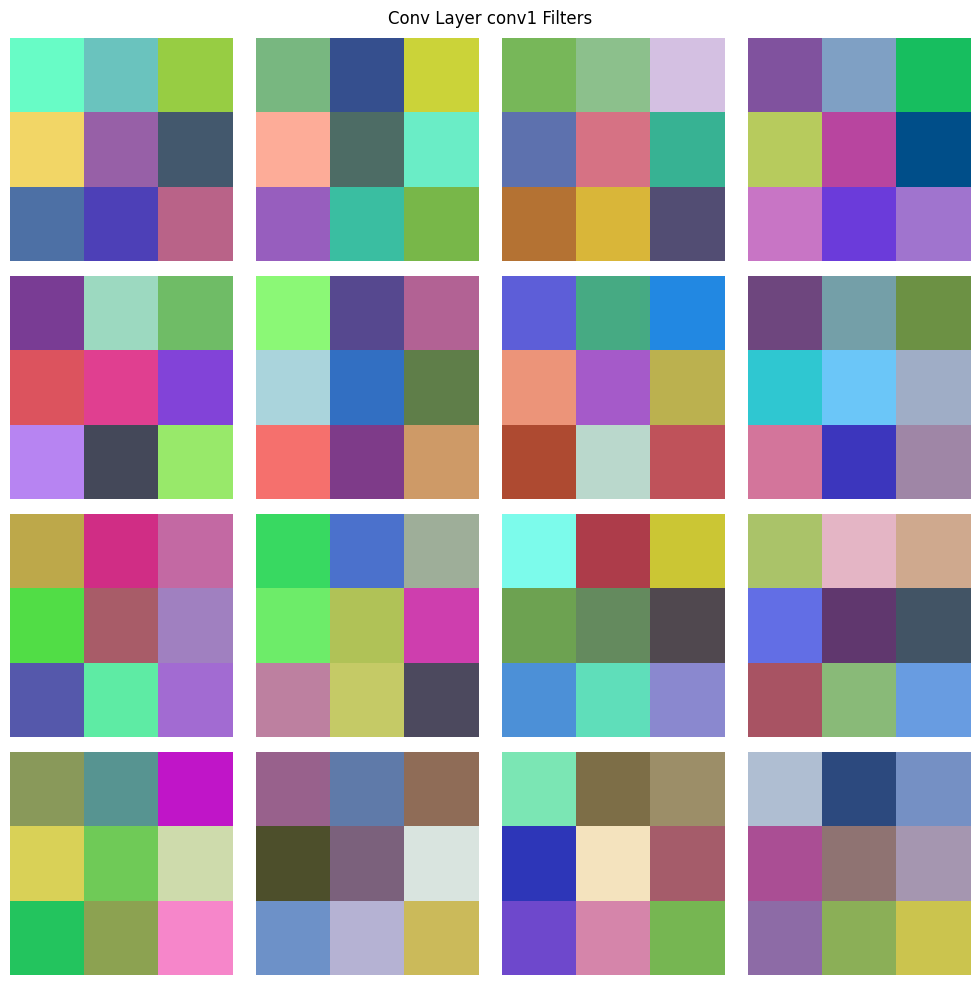


可视化模型预测:


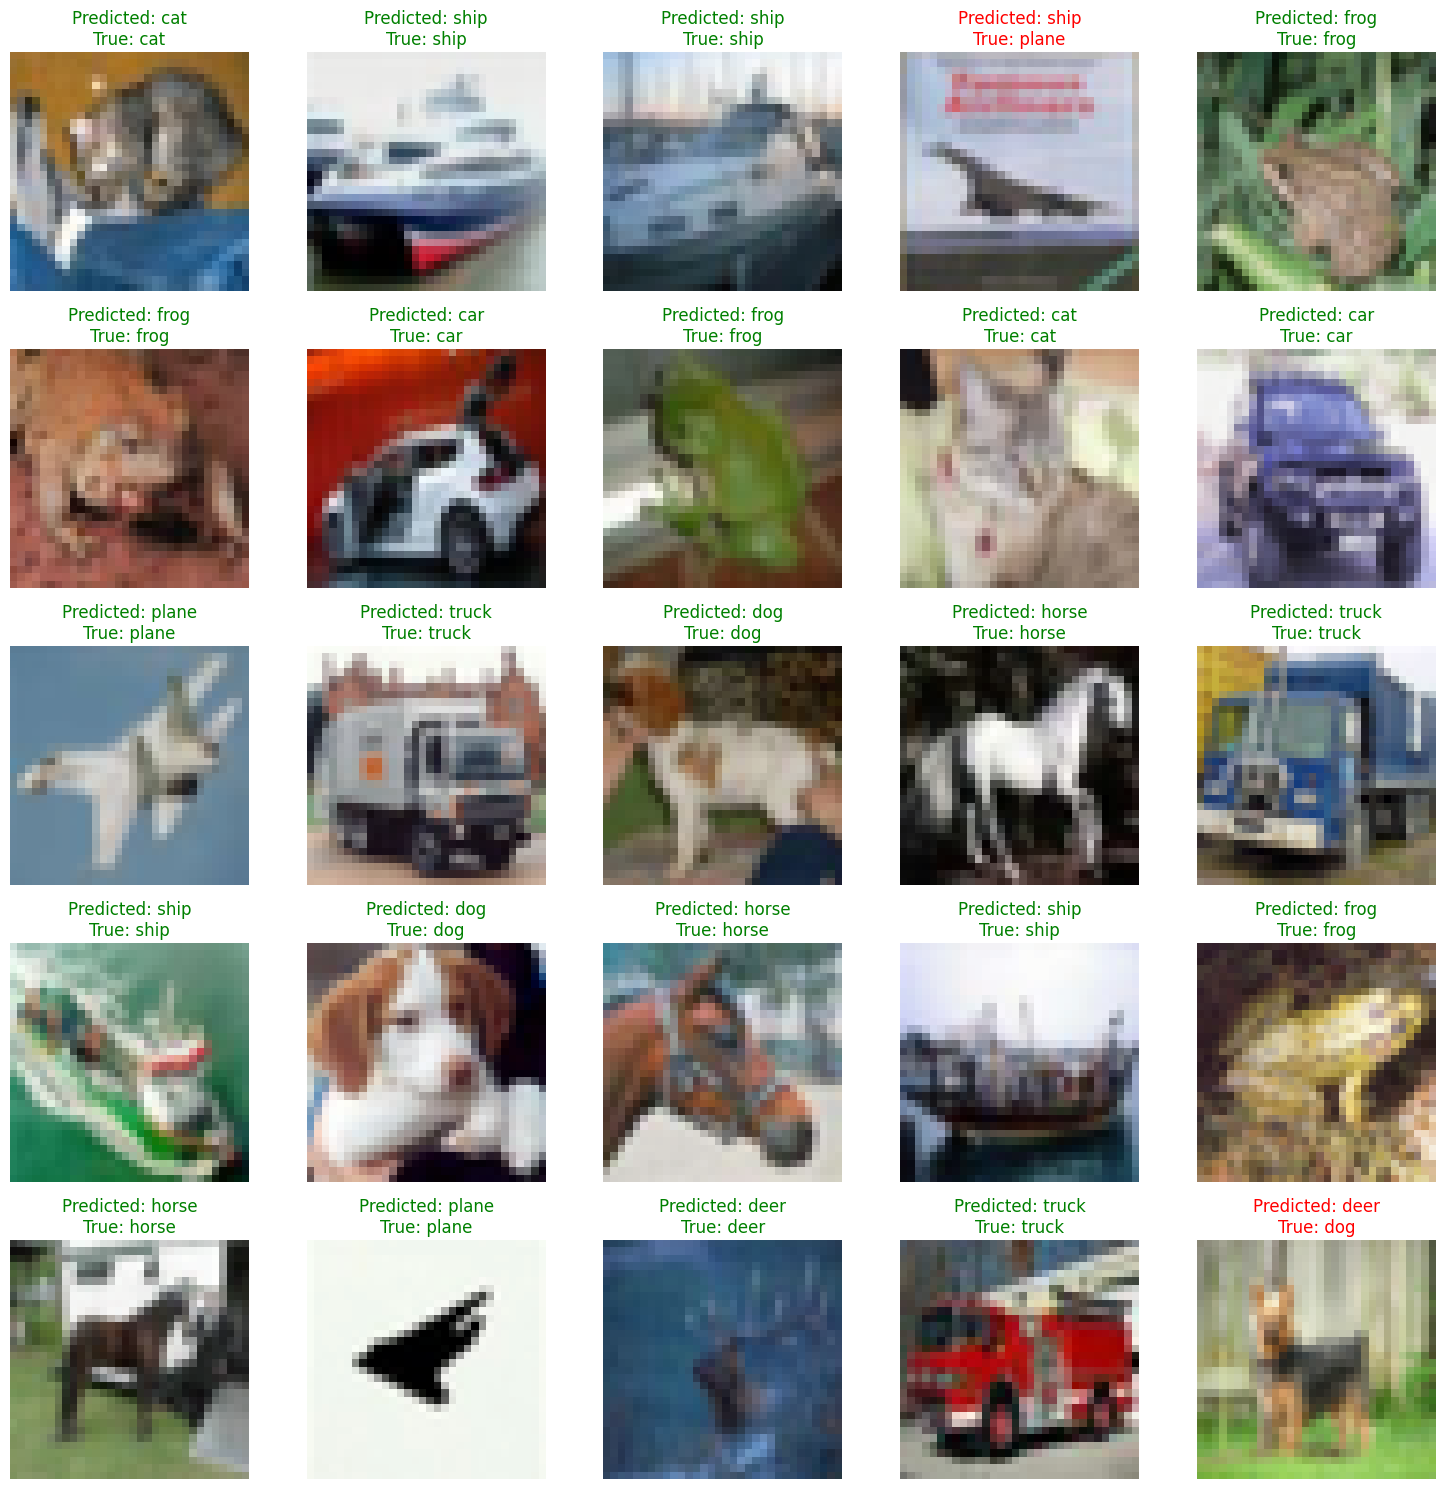


MediumCNN的训练和评估已完成！


In [ ]:
model_type = 'medium_cnn'
model = MediumCNN(use_bn=True)
model_name = "MediumCNN"

# 计算模型复杂度
print("\n分析模型复杂度:")
model_complexity(model, device=device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 可以添加学习率调度器
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

# 确保checkpoints目录存在
os.makedirs(save_directory, exist_ok=True)

# 训练模型
trained_model, history = train_model(
    model, train_loader, valid_loader, criterion, optimizer, scheduler,
    num_epochs=epochs, device=device, save_dir=save_directory
)

# 绘制训练历史
plot_training_history(history, title=f"{model_name} Training History")

# 在测试集上评估模型
print("\n在测试集上评估模型:")
test_loss, test_acc = evaluate_model(trained_model, test_loader, criterion, device, classes)

print(f"{model_name} 最终测试准确率: {test_acc:.4f}")

# 如果是CNN模型并且需要可视化卷积核
if visualize_filters and model_type in ['simple_cnn', 'medium_cnn', 'vgg_style', 'resnet']:
    print("\n可视化卷积核:")
    if model_type == 'simple_cnn':
        visualize_conv_filters(trained_model, 'conv1')
    elif model_type == 'medium_cnn':
        visualize_conv_filters(trained_model, 'conv1')
    elif model_type == 'vgg_style':
        visualize_conv_filters(trained_model, 'features.0')
    else:  # resnet
        visualize_conv_filters(trained_model, 'conv1')

# 如果需要可视化模型预测
if visualize_predictions:
    print("\n可视化模型预测:")
    visualize_model_predictions(trained_model, test_loader, classes, device)

print(f"\n{model_name}的训练和评估已完成！")



分析模型复杂度:
参数量: 3,251,018
每批次(128个样本)推理时间: 3.02ms
Epoch 1/20
模型已保存到 ./ck/VGGStyleNet_best.pth
训练损失: 4.5681, 训练准确率: 0.2607
验证损失: 1.8704, 验证准确率: 0.3730
本轮用时: 17.25s
--------------------------------------------------
Epoch 2/20
模型已保存到 ./ck/VGGStyleNet_best.pth
训练损失: 2.8431, 训练准确率: 0.3687
验证损失: 1.8761, 验证准确率: 0.4692
本轮用时: 16.76s
--------------------------------------------------
Epoch 3/20
模型已保存到 ./ck/VGGStyleNet_best.pth
训练损失: 2.3304, 训练准确率: 0.4412
验证损失: 1.6216, 验证准确率: 0.5116
本轮用时: 15.96s
--------------------------------------------------
Epoch 4/20
模型已保存到 ./ck/VGGStyleNet_best.pth
训练损失: 2.0775, 训练准确率: 0.4922
验证损失: 1.5338, 验证准确率: 0.5560
本轮用时: 15.77s
--------------------------------------------------
Epoch 5/20
模型已保存到 ./ck/VGGStyleNet_best.pth
训练损失: 1.9215, 训练准确率: 0.5338
验证损失: 1.9417, 验证准确率: 0.5770
本轮用时: 15.77s
--------------------------------------------------
Epoch 6/20
模型已保存到 ./ck/VGGStyleNet_best.pth
训练损失: 1.6888, 训练准确率: 0.5782
验证损失: 1.3567, 验证准确率: 0.6204
本轮用时: 15.78s
------------------

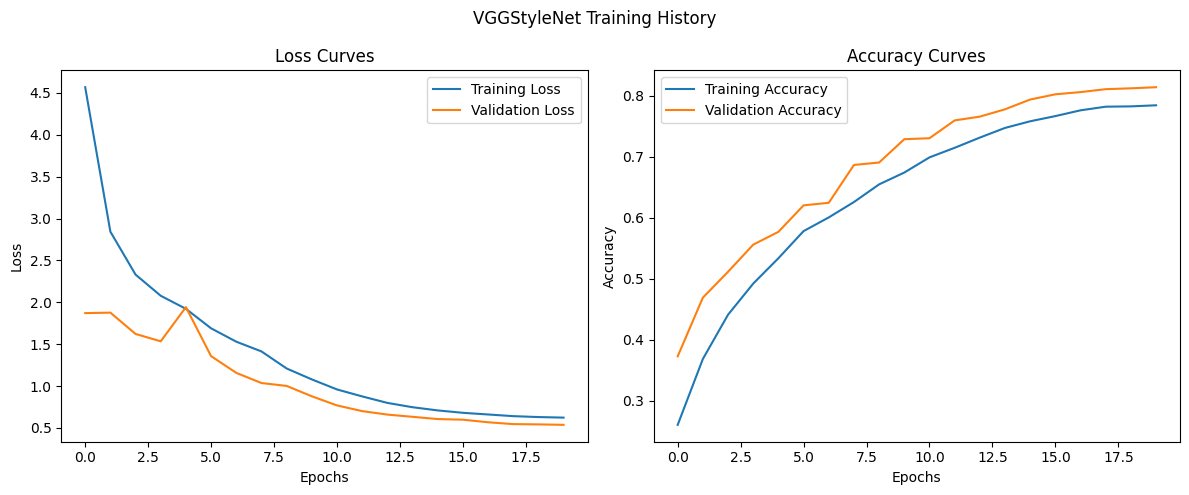


在测试集上评估模型:
测试损失: 0.5319, 测试准确率: 0.8172


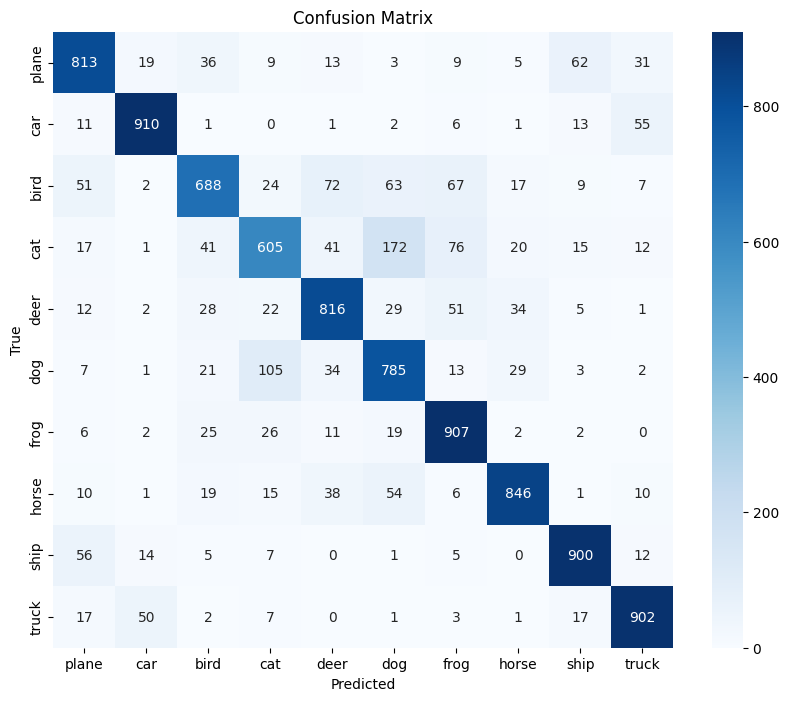

分类报告:
              precision    recall  f1-score   support

       plane       0.81      0.81      0.81      1000
         car       0.91      0.91      0.91      1000
        bird       0.79      0.69      0.74      1000
         cat       0.74      0.60      0.66      1000
        deer       0.80      0.82      0.81      1000
         dog       0.70      0.79      0.74      1000
        frog       0.79      0.91      0.85      1000
       horse       0.89      0.85      0.87      1000
        ship       0.88      0.90      0.89      1000
       truck       0.87      0.90      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

VGGStyleNet 最终测试准确率: 0.8172

可视化卷积核:


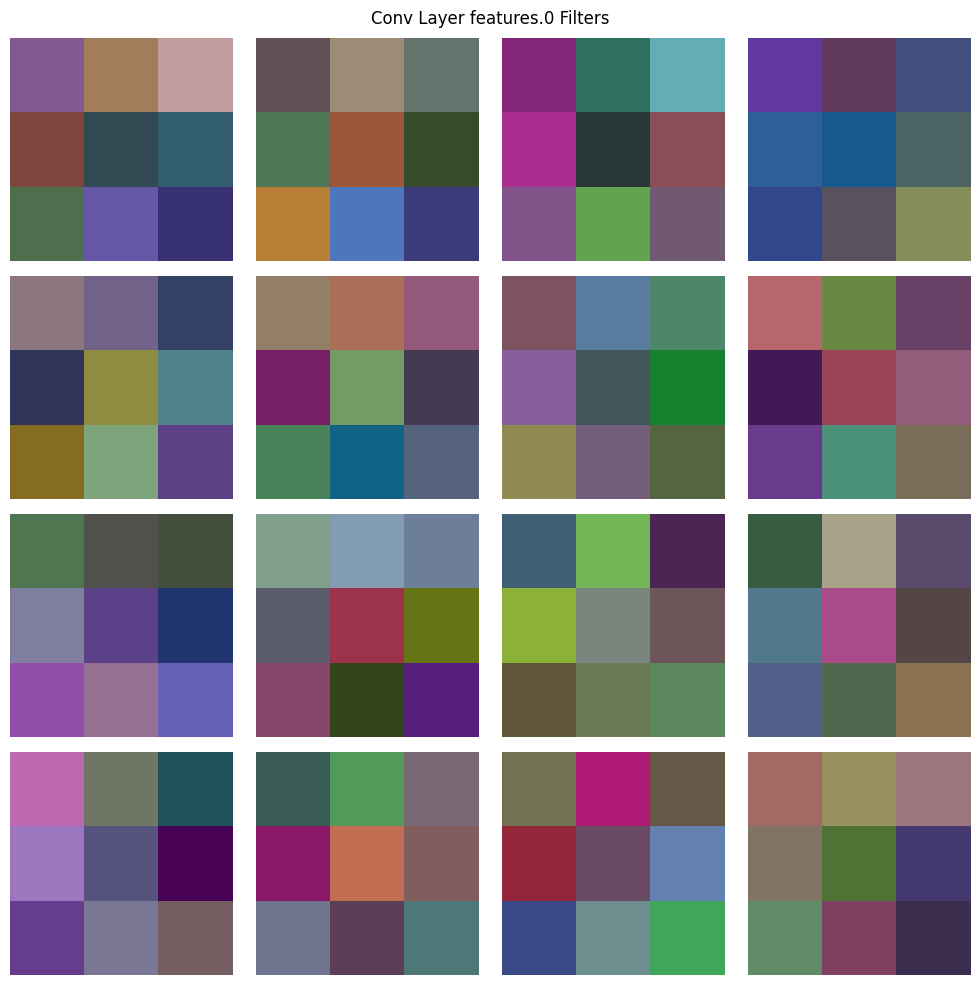


可视化模型预测:


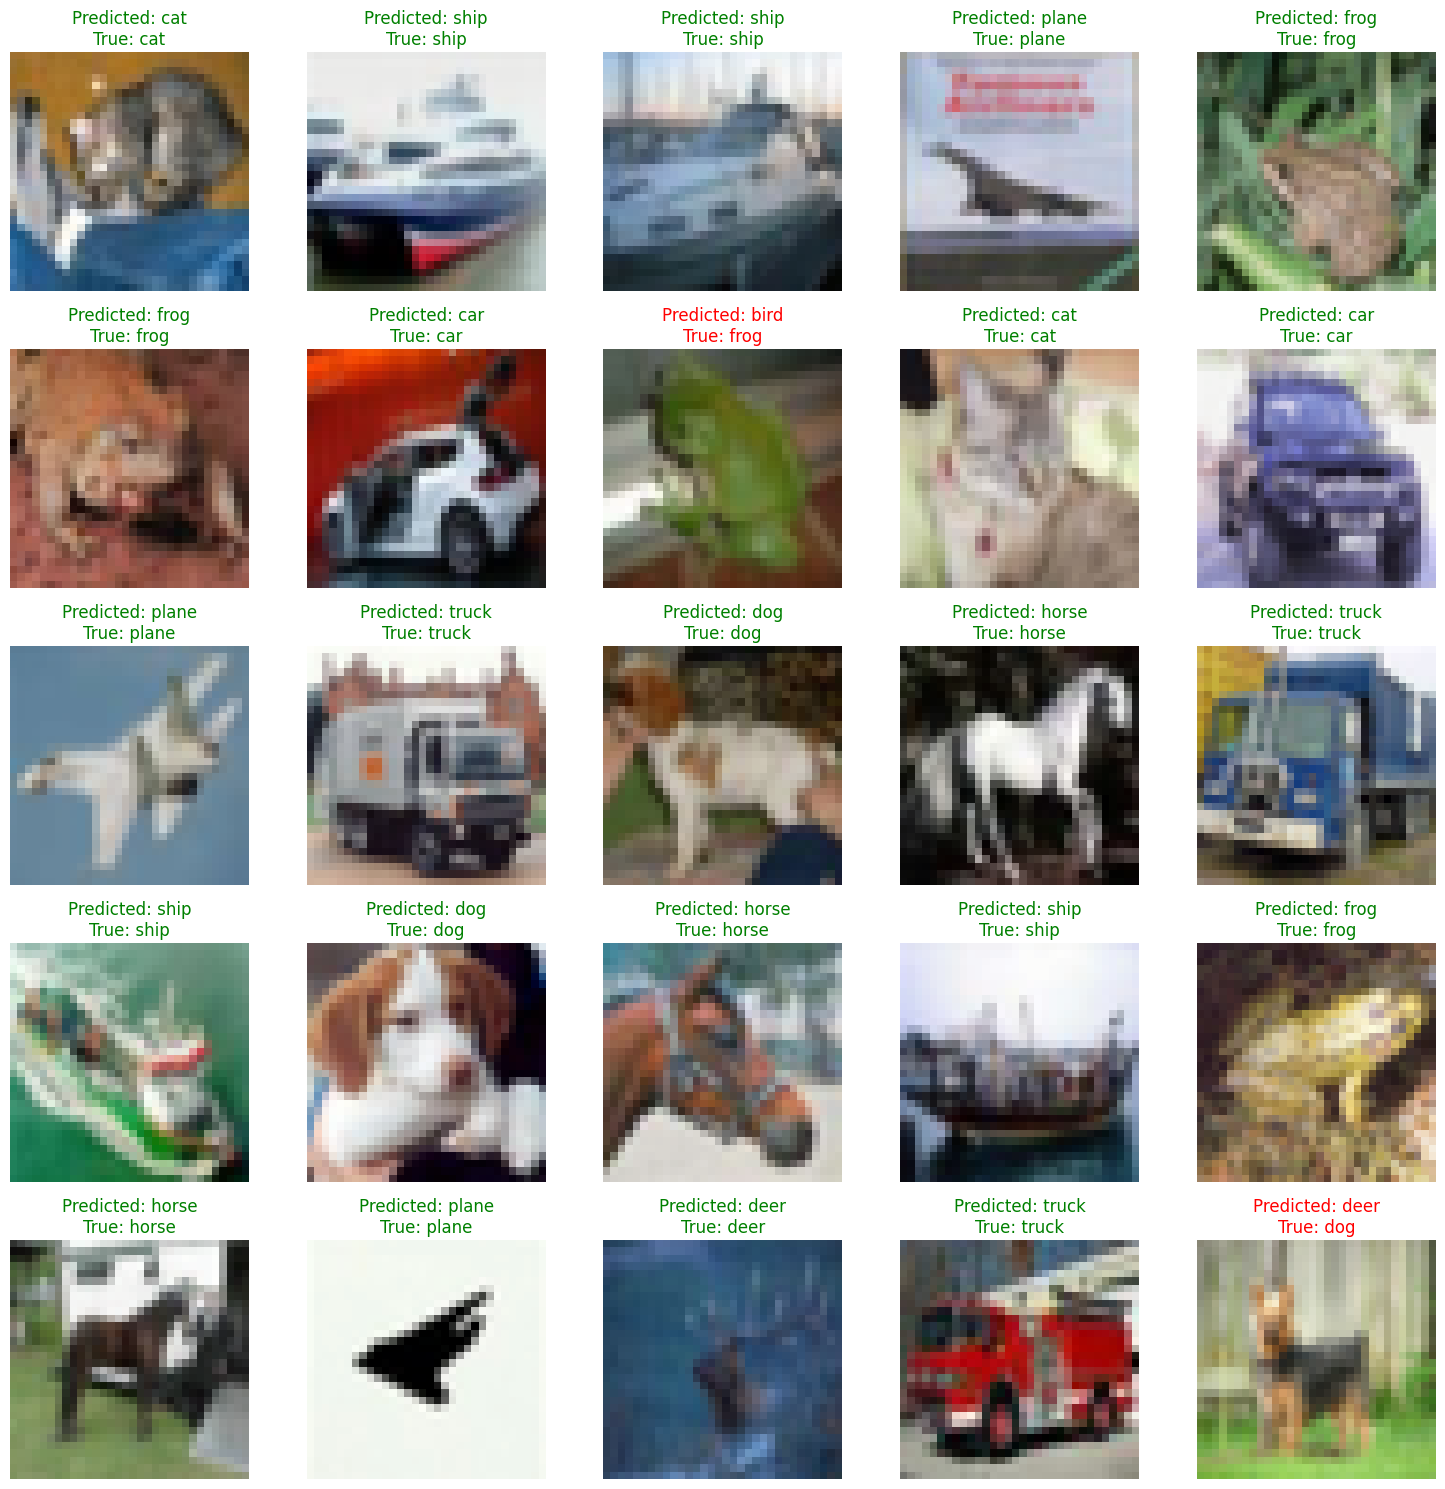


VGGStyleNet的训练和评估已完成！


In [3]:
model_type = 'vgg_style'
model = VGGStyleNet()
model_name = "VGGStyleNet"

# 计算模型复杂度
print("\n分析模型复杂度:")
model_complexity(model, device=device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 可以添加学习率调度器
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

# 确保checkpoints目录存在
os.makedirs(save_directory, exist_ok=True)

# 训练模型
trained_model, history = train_model(
    model, train_loader, valid_loader, criterion, optimizer, scheduler,
    num_epochs=epochs, device=device, save_dir=save_directory
)

# 绘制训练历史
plot_training_history(history, title=f"{model_name} Training History")

# 在测试集上评估模型
print("\n在测试集上评估模型:")
test_loss, test_acc = evaluate_model(trained_model, test_loader, criterion, device, classes)

print(f"{model_name} 最终测试准确率: {test_acc:.4f}")

# 如果是CNN模型并且需要可视化卷积核
if visualize_filters and model_type in ['simple_cnn', 'medium_cnn', 'vgg_style', 'resnet']:
    print("\n可视化卷积核:")
    if model_type == 'simple_cnn':
        visualize_conv_filters(trained_model, 'conv1')
    elif model_type == 'medium_cnn':
        visualize_conv_filters(trained_model, 'conv1')
    elif model_type == 'vgg_style':
        visualize_conv_filters(trained_model, 'features.0')
    else:  # resnet
        visualize_conv_filters(trained_model, 'conv1')

# 如果需要可视化模型预测
if visualize_predictions:
    print("\n可视化模型预测:")
    visualize_model_predictions(trained_model, test_loader, classes, device)

print(f"\n{model_name}的训练和评估已完成！")
